# Import Overlay
导入Overlay

In [1]:
import pynq.lib.dma
import numpy as np
spmvol = pynq.Overlay("spmv.bit")

dma0 = spmvol.axi_dma_0
dma1 = spmvol.axi_dma_1
dma2 = spmvol.axi_dma_2
dma3 = spmvol.axi_dma_3

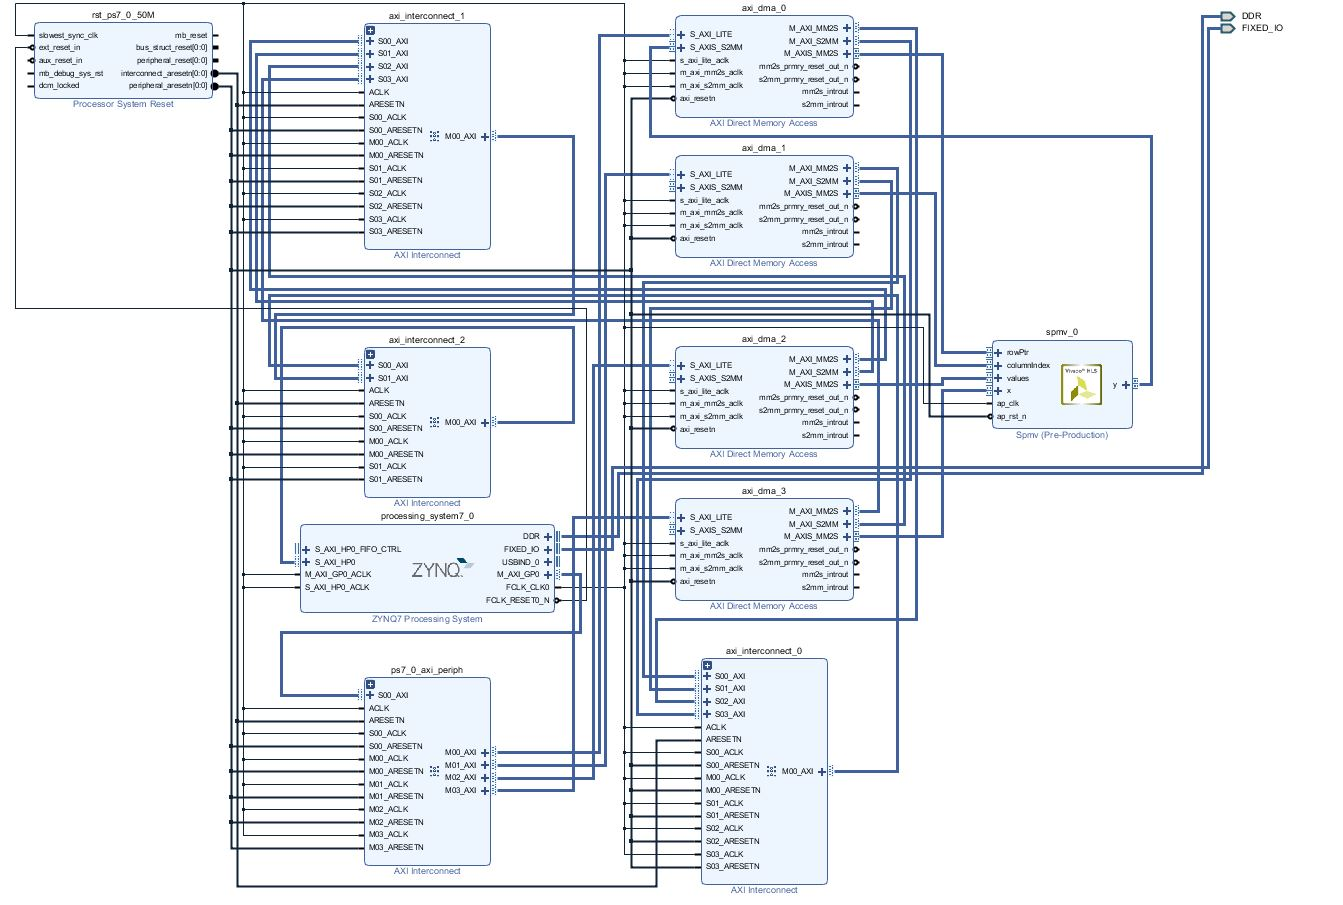

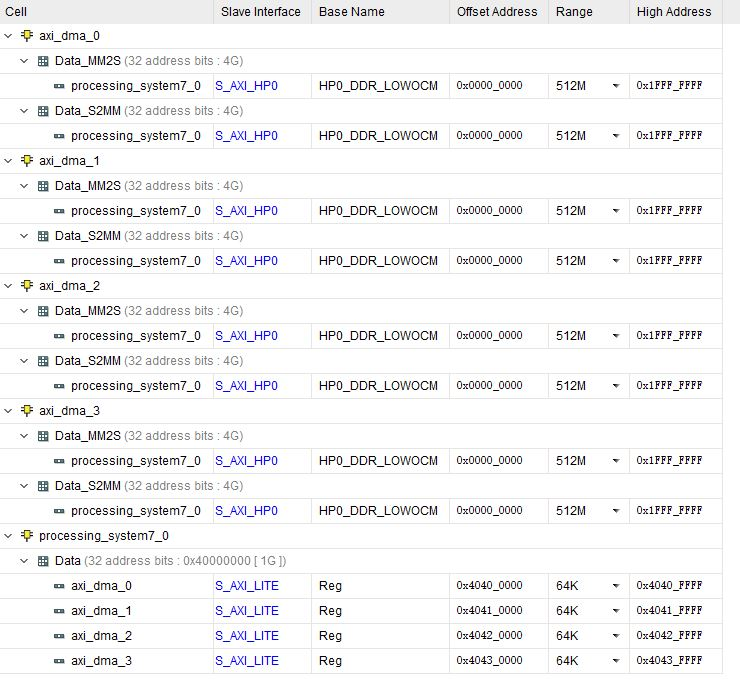

In [2]:
#生成输入数据
from pynq import Xlnk
xlnk = Xlnk()
rowPtr = xlnk.cma_array(shape=(5,), dtype=np.int)
columnIndex = xlnk.cma_array(shape=(9,), dtype=np.int)
values = xlnk.cma_array(shape=(9,), dtype=np.float32)
x = xlnk.cma_array(shape=(4,), dtype=np.float32)
y = xlnk.cma_array(shape=(4,), dtype=np.float32)

rowPtr[0] = 0
rowPtr[1] = 2
rowPtr[2] = 4
rowPtr[3] = 7
rowPtr[4] = 9

columnIndex[0] = 0
columnIndex[1] = 1
columnIndex[2] = 1
columnIndex[3] = 2
columnIndex[4] = 0
columnIndex[5] = 2
columnIndex[6] = 3
columnIndex[7] = 1
columnIndex[8] = 3

values[0] = 3
values[1] = 4
values[2] = 5
values[3] = 9
values[4] = 2
values[5] = 3
values[6] = 1
values[7] = 4
values[8] = 6

x[0] = 1
x[1] = 2
x[2] = 3
x[3] = 4

dma0.sendchannel.transfer(rowPtr)
dma1.sendchannel.transfer(columnIndex)
dma2.sendchannel.transfer(values)
dma3.sendchannel.transfer(x)
dma0.recvchannel.transfer(y)

In [3]:
#打印输出
print(y)

[ 11.  37.  15.  32.]


In [4]:
#写测试用例,并输出
testx = ([1,2,3,4])
testm = ([3,4,0,0],[0,5,9,0],[2,0,3,1],[0,4,0,6])
testy = xlnk.cma_array(shape=(4,), dtype=np.int)
for i in range(4):
    y0 = 0
    for j in range(4):
        y0 += testm[i][j] * testx[j]
    
    testy[i] = y0
    
print(testy)

[11 37 15 32]


In [5]:
#对比数据,正确1,不正确为-1
for i in range(4):
    sigma = 1 if testy[i] == y[i] else -1
    
print(sigma)

1
